# **Data Analysis Project: Bike Sharing**
***

1. Name &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; : Gregorius Abiyoso Kamandanu
1. Email &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp;&nbsp; &nbsp;: kamandanug@gmail.com
1. Dicoding ID &nbsp; &nbsp;: gakamandanu

## **1. Background and Dataset**
***

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions, precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com. 

## **2. Business Questions**
***

The following questions will help to analyze the data after knowing the data fields and their details.

1. How was the bike rent trend from 2011 to 2012? 
1. How do day, which is wheter weekday or weekend, affect the count of bike rent? 
1. How do weather situation affect the count of bike rent?
1. What month shows the highest bike rent? 
1. What times indicates best bike rent activities?
1. How does casual user compare to registered user from total rental bikes?  

## **3. Data Wrangling**
***

### **3.1 Data Gathering**

Import the following libraries to solve this project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import the data using `pandas` library. Both `hour.csv` and `day.csv` have the following fields, except `hr` which is not available in `day.csv`. Data description: 
- `instant`: record index
- `dteday` : date
- `season` : season (1:springer, 2:summer, 3:fall, 4:winter)
- `yr` : year (0: 2011, 1:2012)
- `mnth` : month ( 1 to 12)
- `hr` : hour (0 to 23)
- `holiday` : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- `weekday` : day of the week
- `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.
- `weathersit` : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp` : Normalized temperature in Celsius. The values are divided to 41 (max)
- `atemp`: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- `hum`: Normalized humidity. The values are divided to 100 (max)
- `windspeed`: Normalized wind speed. The values are divided to 67 (max)
- `casual`: count of casual users
- `registered`: count of registered users
- `cnt`: count of total rental bikes including both casual and registered

In [2]:
day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')

In [3]:
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [4]:
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


- The `day_df` has only 16 columns because it has no `hr` field as mention before and much fewer rows than `hour_df`. This is make sense because `hr` tell us about bike rent activity in specific hour.  

### **3.2 Asessing Data**

In this section, there are several step to assess `day_df` and `hour_df`, i.e check the data type, check for missing value, check for duplicate value, do quick statistical identification, etc. 

### 3.2.1 `day_df` 

### Check for data type

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


- The result show there is an oddity in `dteday` column. It has **object** data type whereas it should be **datetime** data type. 

### Check for data duplicate

In [6]:
day_df.duplicated().sum()

0

- `day_df` has no duplicate value.

### Check for **NULL** value

In [7]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- `day_df` has no **NULL** value  

### Do quick statistical identification or descriptive statistic for data

In [8]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


- There is no oddity from this result. The normalized `temp`, `atemp`, and `hum` will be denormalized with max scale mentioned on the data description. `windspeed` is not considered to be denormalized to prevent misleading because it has no clear unit wheter mph or kmph, etc.

### 3.2.2 `hour_df` 

### Check for data type

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


- The result show there is an oddity in `dteday` column. It has **object** data type whereas it should be **datetime** data type. 

### Check for data duplicate

In [10]:
hour_df.duplicated().sum()

0

- `hour_df` has no duplicate value.

### Check for **NULL** value

In [11]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- `hour_df` has no **NULL** value  

### Do quick statistical identification or descriptive statistic for data

In [12]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


- There is no oddity from this result. The normalized `temp`, `atemp`, and `hum` will be denormalized with max scale mentioned on the data description. `windspeed` is not considered to be denormalized to prevent misleading because it has no clear unit wheter mph or kmph, etc.
- This also give us intepretation that actually `hour_df` is similar to `day_df` but just more complex due to `hr` field. In `dteday`, the unique value is 731 which is same as `day_df` rows. This is true considering `hr` value is set from 0-23, hour value in a day, so `hour_df` contains `day_df` date exactly with more detailed hour time.    

### DataFrame summary

- Both of `day_df` and `hour_df` are perfect clean data because have no missing values or duplicated data although this gone rarely in real industry.
- The project analysis will tend use `hour_df` since it's more complex.  

## **4. Data Cleaning**
***

### **4.1 Data Field Conversion**

### Convert `dteday` to **datetime** data type

In [13]:
day_df['dteday']=pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [14]:
hour_df['dteday']=pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

### Convert several fields to categorical values

 Since `season`, `yr`, `weekday` and `weathersit` are actually categorical fields which their values written in the description so they need to be converted to categorical value

In [15]:
day_df['new_season']=day_df['season'].apply(lambda x: "Spring" if x ==1 else ("Summer" if x==2 else ("Fall" if x==3 else "Winter")))
day_df['new_yr']=day_df['yr'].apply(lambda x: "2011" if x==0 else "2012")
# day_df['new_mnth']=day_df['mnth'].apply(lambda x: "January" if x ==1 else ("February" if x==2 else ("March" if x==3 else ("April" if x==4 else ("May" if x==5 else ("June" if x==6 else ("July" if x==7 else ("August" if x==8 else ("September" if x==9 else ("October" if x==10 else ("November" if x==11 else "December")))))))))))
day_df['new_weekday']=day_df['weekday'].apply(lambda x: "Sunday" if x ==0 else ("Monday" if x==1 else ("Tuesday" if x==2 else ("Wednesday" if x==3 else ("Thursday" if x==4 else ("Friday" if x==5 else "Saturday"))))))
day_df['new_weathersit']=day_df['weathersit'].apply(lambda x: "Clear, Few clouds" if x ==1 else ("Mist, cloudy" if x==2 else ("Light snow/ light rain" if x==3 else "Heavy rain, snow")))


In [16]:
hour_df['new_season']=hour_df['season'].apply(lambda x: "Spring" if x ==1 else ("Summer" if x==2 else ("Fall" if x==3 else "Winter")))
hour_df['new_yr']=hour_df['yr'].apply(lambda x: "2011" if x==0 else "2012")
# hour_df['new_mnth']=hour_df['mnth'].apply(lambda x: "January" if x ==1 else ("February" if x==2 else ("March" if x==3 else ("April" if x==4 else ("May" if x==5 else ("June" if x==6 else ("July" if x==7 else ("August" if x==8 else ("September" if x==9 else ("October" if x==10 else ("November" if x==11 else "December")))))))))))
hour_df['new_weekday']=hour_df['weekday'].apply(lambda x: "Sunday" if x ==0 else ("Monday" if x==1 else ("Tuesday" if x==2 else ("Wednesday" if x==3 else ("Thursday" if x==4 else ("Friday" if x==5 else "Saturday"))))))
hour_df['new_weathersit']=hour_df['weathersit'].apply(lambda x: "Clear, Few clouds" if x ==1 else ("Mist, cloudy" if x==2 else ("Light snow/ light rain" if x==3 else "Heavy rain, snow")))


In [17]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,new_season,new_yr,new_weekday,new_weathersit
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Spring,2011,Saturday,"Mist, cloudy"
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Spring,2011,Sunday,"Mist, cloudy"
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Spring,2011,Monday,"Clear, Few clouds"
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Spring,2011,Tuesday,"Clear, Few clouds"
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Spring,2011,Wednesday,"Clear, Few clouds"


In [18]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,new_season,new_yr,new_weekday,new_weathersit
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.2879,0.81,0.0,3,13,16,Spring,2011,Saturday,"Clear, Few clouds"
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.2727,0.80,0.0,8,32,40,Spring,2011,Saturday,"Clear, Few clouds"
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.2727,0.80,0.0,5,27,32,Spring,2011,Saturday,"Clear, Few clouds"
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.2879,0.75,0.0,3,10,13,Spring,2011,Saturday,"Clear, Few clouds"
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.2879,0.75,0.0,0,1,1,Spring,2011,Saturday,"Clear, Few clouds"


### **4.2 Data Denormalization**

### Denormalize the `temp`, `atemp`, and `hum`. 

Take back normalized data formula which is: 

\begin{align*}
    z_{i}=\frac{x_{i}-x_{min}}{x_{max}-x_{min}}
\end{align*}

which $z_{i}$ refers to the $i$-th normalized data, $x_{i}$ refers to the $i$-th raw data, $x_{min}$ and $x_{max}$ are minimum and maximum value from the raw data/dataset, respectively. The information from data description shows that `temp`, `atemp`, and `hum` have $x_{min}$ equal to 0 implicitly because from the formula above and data description states that those fields should multiplied by their maximum value to obtain their original value (denormalized data).  

In [19]:
day_df['den_temp']=day_df['temp'].apply(lambda x: x*41)
day_df['den_atemp']=day_df['atemp'].apply(lambda x: x*50)
day_df['den_hum']=day_df['hum'].apply(lambda x: x*100)

In [20]:
hour_df['den_temp']=hour_df['temp'].apply(lambda x: x*41)
hour_df['den_atemp']=hour_df['atemp'].apply(lambda x: x*50)
hour_df['den_hum']=hour_df['hum'].apply(lambda x: x*100)

In [21]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,casual,registered,cnt,new_season,new_yr,new_weekday,new_weathersit,den_temp,den_atemp,den_hum
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,331,654,985,Spring,2011,Saturday,"Mist, cloudy",14.110847,18.18125,80.5833
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,131,670,801,Spring,2011,Sunday,"Mist, cloudy",14.902598,17.68695,69.6087
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,120,1229,1349,Spring,2011,Monday,"Clear, Few clouds",8.050924,9.47025,43.7273
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,108,1454,1562,Spring,2011,Tuesday,"Clear, Few clouds",8.200000,10.60610,59.0435
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,82,1518,1600,Spring,2011,Wednesday,"Clear, Few clouds",9.305237,11.46350,43.6957


In [22]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,casual,registered,cnt,new_season,new_yr,new_weekday,new_weathersit,den_temp,den_atemp,den_hum
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,3,13,16,Spring,2011,Saturday,"Clear, Few clouds",9.84,14.395,81.0
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,8,32,40,Spring,2011,Saturday,"Clear, Few clouds",9.02,13.635,80.0
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,5,27,32,Spring,2011,Saturday,"Clear, Few clouds",9.02,13.635,80.0
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,3,10,13,Spring,2011,Saturday,"Clear, Few clouds",9.84,14.395,75.0
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0,1,1,Spring,2011,Saturday,"Clear, Few clouds",9.84,14.395,75.0


To validate the calculation, let's plot the data to see how reasonable and real the result. `day_df` is used to do quick validation. 

Text(0, 0.5, 'TRelative Humidity (%)')

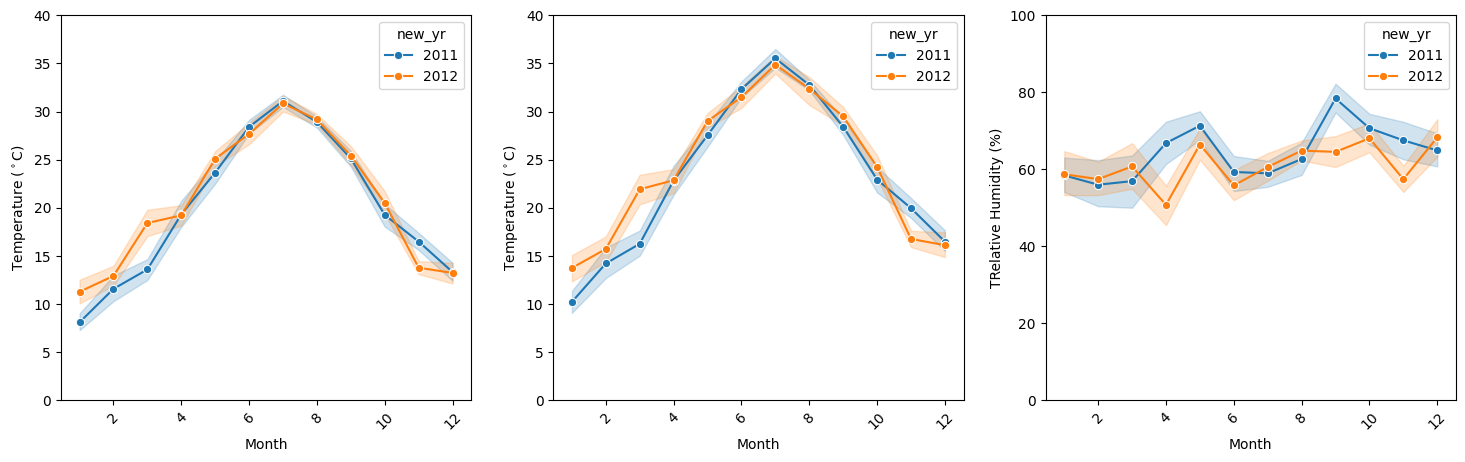

In [59]:
physical_properties=['den_temp','den_atemp','den_hum']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18,5)) 
axs[0].set_xlabel('Month')
axs[2].set_xlabel('Month')
axs[1].set_xlabel('Month')

for i, ax in enumerate(axs):
    sns.lineplot(x=day_df['mnth'],y=day_df[physical_properties[i]],hue=day_df['new_yr'], ax=ax, marker='o')
#temperature 
axs[0].tick_params(axis='x',labelrotation=45)
axs[0].set_ylim([0,40])
axs[0].set_ylabel(r'Temperature ($^\circ$C)')

#feeling temp
axs[1].tick_params(axis='x',labelrotation=45)
axs[1].set_ylim([0,40])
axs[1].set_ylabel(r'Temperature ($^\circ$C)')

#humidity
axs[2].tick_params(axis='x',labelrotation=45)
axs[2].set_ylim([0,100])
axs[2].set_ylabel(r'TRelative Humidity (%)')

- The plots show good intepretation and look reasonable if we imagine and compare to the real situation. It shows the peak temperature is in July 

### **4.3 Final Data**

Save the final data for dashboard implementation

In [24]:
final_day_data = day_df.drop(['season', 'yr', 'weekday','weathersit'],axis=1)
final_day_data.head()

,instant,dteday,mnth,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,new_season,new_yr,new_weekday,new_weathersit,den_temp,den_atemp,den_hum
0,1,2011-01-01,1,0,0,0.344167,0.363625,0.805833,0.160446,331,654,985,Spring,2011,Saturday,"Mist, cloudy",14.110847,18.18125,80.5833
1,2,2011-01-02,1,0,0,0.363478,0.353739,0.696087,0.248539,131,670,801,Spring,2011,Sunday,"Mist, cloudy",14.902598,17.68695,69.6087
2,3,2011-01-03,1,0,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Spring,2011,Monday,"Clear, Few clouds",8.050924,9.47025,43.7273
3,4,2011-01-04,1,0,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Spring,2011,Tuesday,"Clear, Few clouds",8.200000,10.60610,59.0435
4,5,2011-01-05,1,0,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Spring,2011,Wednesday,"Clear, Few clouds",9.305237,11.46350,43.6957


In [25]:
final_hour_data = hour_df.drop(['season', 'yr', 'weekday','weathersit'],axis=1)
final_hour_data.head()

,instant,dteday,mnth,hr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,new_season,new_yr,new_weekday,new_weathersit,den_temp,den_atemp,den_hum
0,1,2011-01-01,1,0,0,0,0.24,0.2879,0.81,0.0,3,13,16,Spring,2011,Saturday,"Clear, Few clouds",9.84,14.395,81.0
1,2,2011-01-01,1,1,0,0,0.22,0.2727,0.80,0.0,8,32,40,Spring,2011,Saturday,"Clear, Few clouds",9.02,13.635,80.0
2,3,2011-01-01,1,2,0,0,0.22,0.2727,0.80,0.0,5,27,32,Spring,2011,Saturday,"Clear, Few clouds",9.02,13.635,80.0
3,4,2011-01-01,1,3,0,0,0.24,0.2879,0.75,0.0,3,10,13,Spring,2011,Saturday,"Clear, Few clouds",9.84,14.395,75.0
4,5,2011-01-01,1,4,0,0,0.24,0.2879,0.75,0.0,0,1,1,Spring,2011,Saturday,"Clear, Few clouds",9.84,14.395,75.0


In [26]:
final_day_data.to_csv('final_day_data.csv')
final_hour_data.to_csv('final_hour_data.csv')

## **5. Exploratory Data Analysis (EDA)**
***

 In this section, EDA will be done using **data visualization** or **tabulation** to search for any insights that can answer the Business Questions written in Section 2 implicitly or explicitly. 

### **5.1 Analysis on `temp`, `atemp`, and `hum`**

Histogram for the physical properties

Text(0.5, 0, 'Relative Humidity (%)')

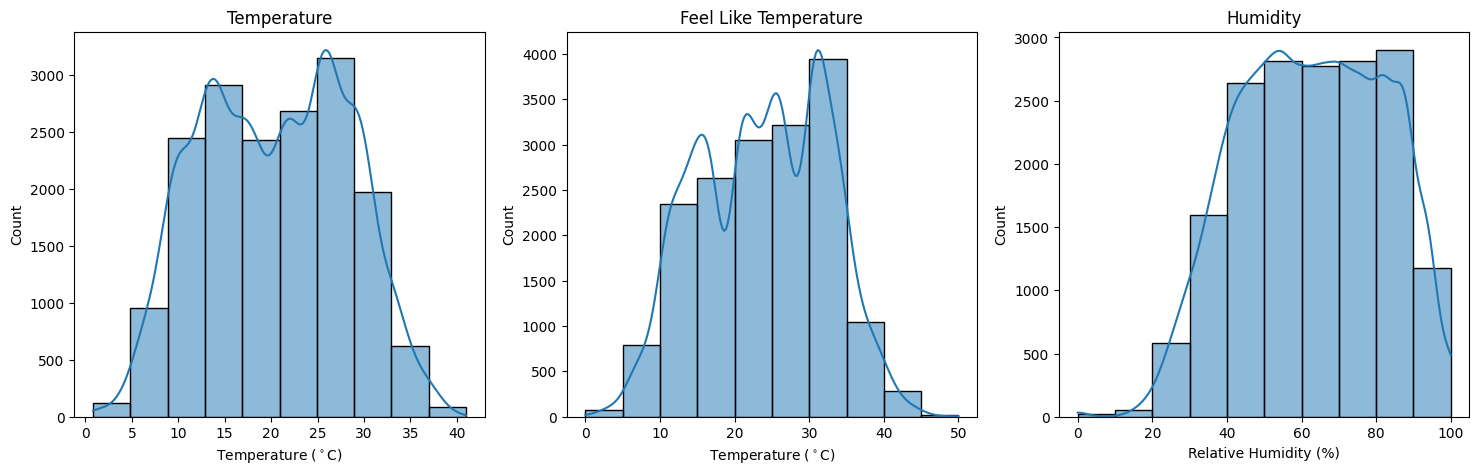

In [27]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18,5)) 

for i, ax in enumerate(axs):
    sns.histplot(x=final_hour_data[physical_properties[i]], ax=ax, bins=10, kde=True)
#temperature 
axs[0].set_title('Temperature')
axs[0].set_xlabel(r'Temperature ($^\circ$C)')

#feeling temp
axs[1].set_title('Feel Like Temperature')
axs[1].set_xlabel(r'Temperature ($^\circ$C)')

#humidity
axs[2].set_title('Humidity')
axs[2].set_xlabel('Relative Humidity (%)')

Skewness formula: 

\begin{align*}
    S = 3\frac{(\bar{x}-median)}{\sigma}
\end{align*}

with $S$ is skewness, $\bar{x}$ is data mean, median is data median, and $\sigma$ is data standard deviation.

In [28]:
for i in range(len(physical_properties)):
    s=3*(final_hour_data[physical_properties].iloc[:,i].mean()-final_hour_data[physical_properties].iloc[:,i].median())/final_hour_data[physical_properties].iloc[:,i].std()
    print(f"{physical_properties[i]} skewness = {s}")

den_temp skewness = -0.046939534699617334
den_atemp skewness = -0.15754820845361883
den_hum skewness = -0.043090700972946594


Boxplot for the physical properties

Text(0.5, 0, 'Relative Humidity (%)')

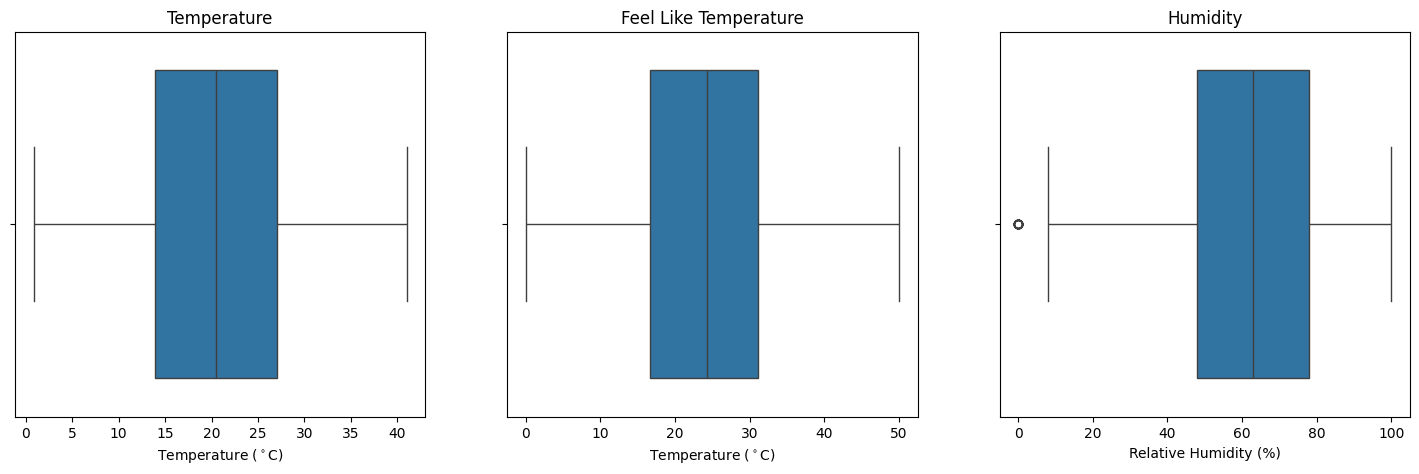

In [29]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18,5)) 

for i, ax in enumerate(axs):
    sns.boxplot(x=final_hour_data[physical_properties[i]], ax=ax)
#temperature 
axs[0].set_title('Temperature')
axs[0].set_xlabel(r'Temperature ($^\circ$C)')

#feeling temp
axs[1].set_title('Feel Like Temperature')
axs[1].set_xlabel(r'Temperature ($^\circ$C)')

#humidity
axs[2].set_title('Humidity')
axs[2].set_xlabel('Relative Humidity (%)')


In [30]:
#humidity outlier value 

final_hour_data['den_hum'].sort_values(ascending=True)


1565       0.0
1570       0.0
1568       0.0
1567       0.0
1566       0.0
         ...  
16866    100.0
2263     100.0
2262     100.0
3128     100.0
8044     100.0
Name: den_hum, Length: 17379, dtype: float64

<Axes: xlabel='den_atemp', ylabel='den_hum'>

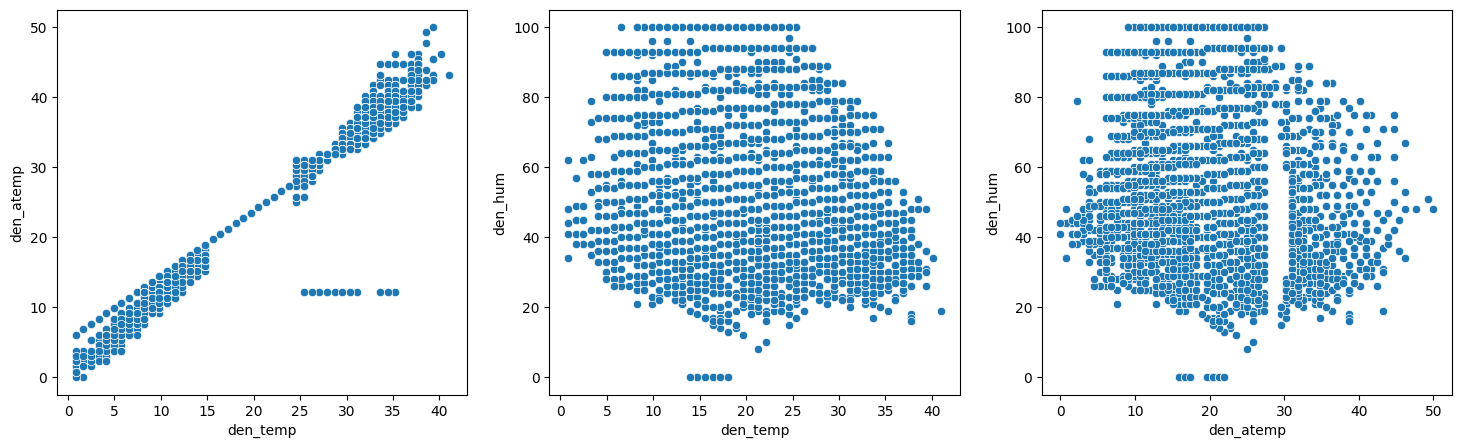

In [31]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18,5)) 

sns.scatterplot(x=final_hour_data['den_temp'], y=final_hour_data['den_atemp'], ax=axs[0])
sns.scatterplot(x=final_hour_data['den_temp'], y=final_hour_data['den_hum'], ax=axs[1])
sns.scatterplot(x=final_hour_data['den_atemp'], y=final_hour_data['den_hum'], ax=axs[2])

<Axes: >

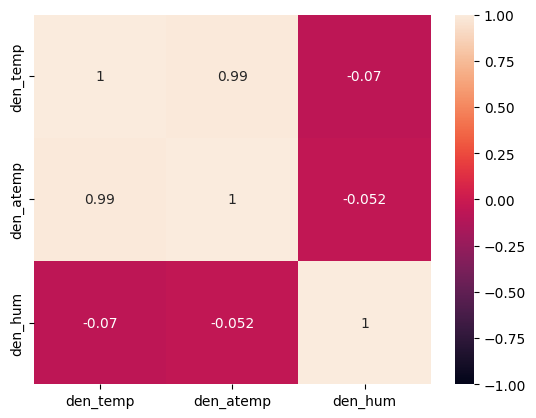

In [32]:
#physical properties heatmap
sns.heatmap(final_hour_data[physical_properties].corr(), vmin=-1, vmax=1, annot=True)

- All the physical properties histogram show left-skewed data distribution since they have negative skewness value. 
- The boxplot of physical properties inteprete that they show good descriptive statistic result. Outlier just appears in `hum` field. 
- Physical properties show unique correlation. `temp` and `atemp`, which also state about temperature affected by humidity, show good correlation with 0.99 value. Suprisingly, both of them show no relation with `hum` by showing the correlation value is near 0. 

### **5.2 Count of Bike Rent User**

Histogram and boxplot for total bike rent user

<Axes: xlabel='cnt'>

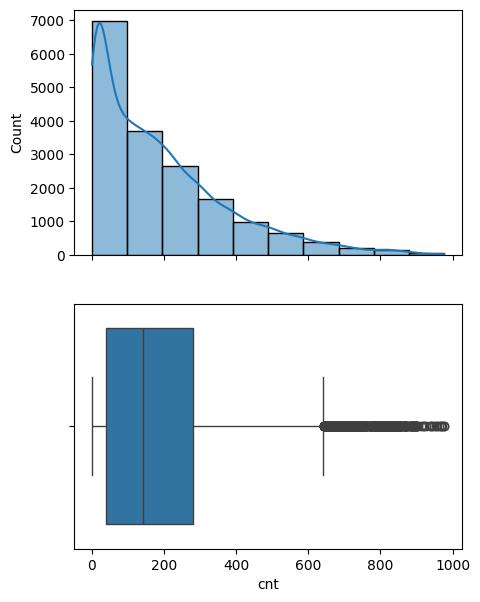

In [33]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(5,7), sharex=True) 

sns.histplot(x=final_hour_data['cnt'],ax=axs[0], bins=10, kde=True)
sns.boxplot(x=final_hour_data['cnt'])

- The number of total user show right skewed data distribution.
- Outlier datas appear start from about 600. This phenomenon is interesting to be explored why this occurs like what factors make this.  

`casual` and `registered` bike user comparison in 2011 and 2012

Do a groupby and save as a pivot table called `annually_pivot`

In [34]:
annually_pivot=final_day_data.groupby('new_yr').agg({"casual":"sum", "registered":"sum"}).reset_index()

annually_pivot

,new_yr,casual,registered
0,2011,247252,995851
1,2012,372765,1676811


Text(0.5, 1.0, '2012')

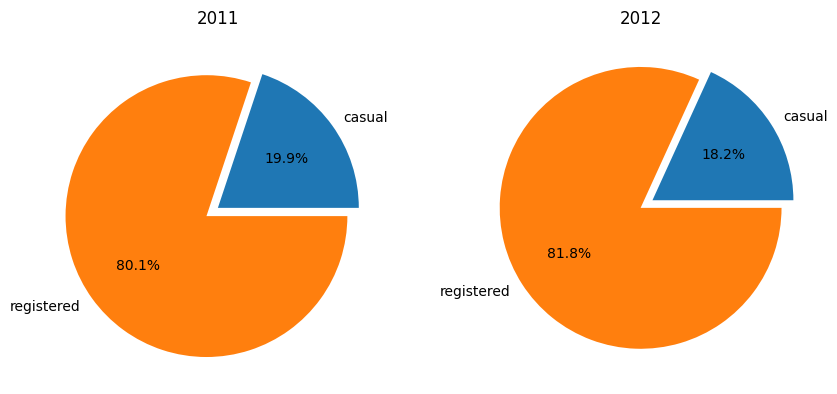

In [35]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5)) 

axs[0].pie(final_day_data[['casual','registered']][final_day_data['new_yr']=='2011'].sum(),labels=['casual', 'registered'], explode=[0, 0.1],autopct = '%1.1f%%')
axs[1].pie(final_day_data[['casual','registered']][final_day_data['new_yr']=='2012'].sum(),labels=['casual', 'registered'], explode=[0.1, 0],autopct = '%1.1f%%')

axs[0].set_title('2011')
axs[1].set_title('2012')

Built an unpivot dataframe so we can made a multicolumn barplot in one $x$ value

In [36]:
annually_users_df = pd.melt(annually_pivot,
    id_vars=['new_yr'],
    value_vars=['casual', 'registered'],
    var_name='status',
    value_name='count'
)

annually_users_df

,new_yr,status,count
0,2011,casual,247252
1,2012,casual,372765
2,2011,registered,995851
3,2012,registered,1676811


In [159]:
2049576-1243103

806473

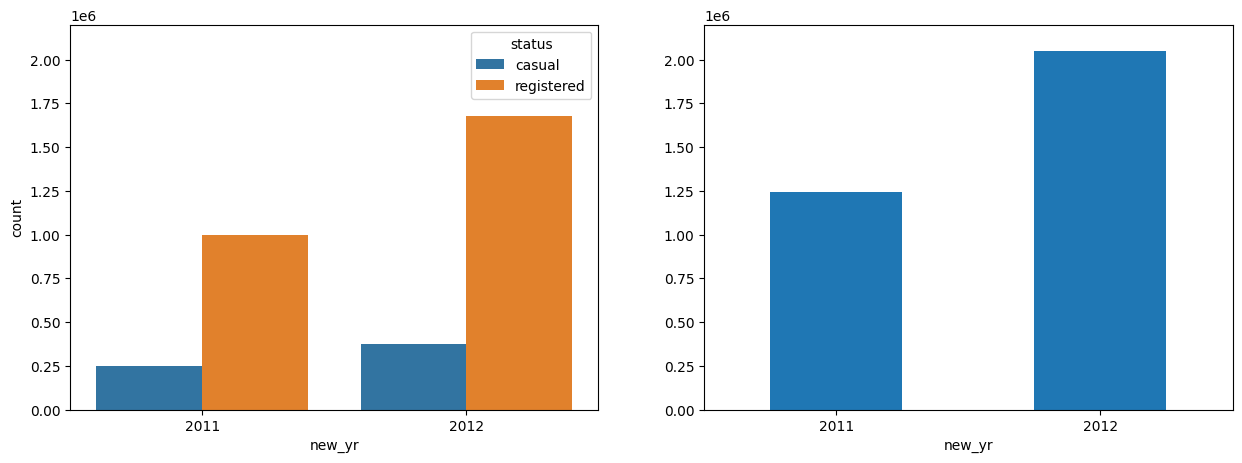

In [158]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5)) 

sns.barplot(data=annually_users_df, x='new_yr', y='count', hue='status', ax=axs[0])
final_day_data.groupby(['new_yr'])['cnt'].sum().plot(kind='bar')

axs[1].tick_params(axis='x',labelrotation=0)

axs[0].set_ylim([0, 2.2e6])
axs[1].set_ylim([0, 2.2e6])
plt.show()

- The comparison of casual and registered bike rent users is **1:4**
- Count of registered bike rent users increased **1.7%** or about **680960 users** from 2011 to 2012. It shows good result because more company members join the membership as registered users.

The following graphs shows how was the trendline of bike rent in time-series plot. The aim is to get information about which time show highest bike rent. 

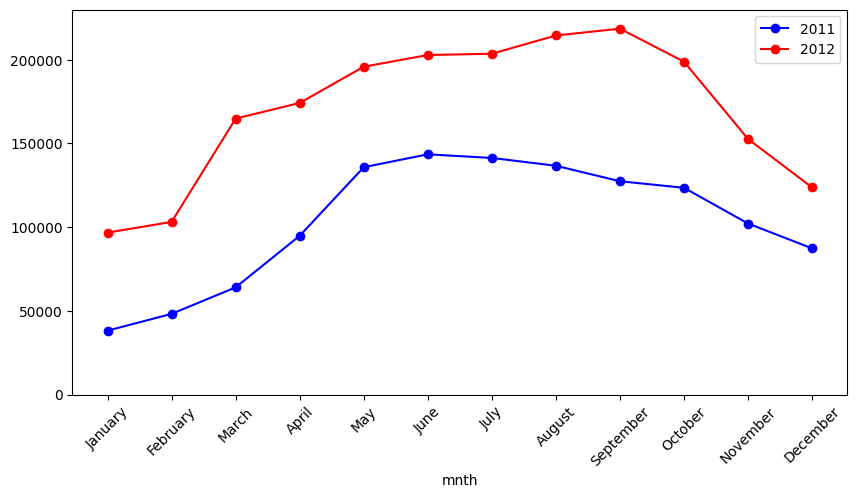

In [ ]:
plt.figure(figsize=(10,5))

final_hour_data[final_hour_data['new_yr']=='2011'].groupby(['mnth'])['cnt'].sum().plot(kind='line', color='blue', marker='o')
final_hour_data[final_hour_data['new_yr']=='2012'].groupby(['mnth'])['cnt'].sum().plot(kind='line', color='red', marker='o')

plt.xticks(range(1,13),month_labels, rotation=45)

plt.legend(['2011', '2012'])

plt.ylim([0, 230000])
plt.show()

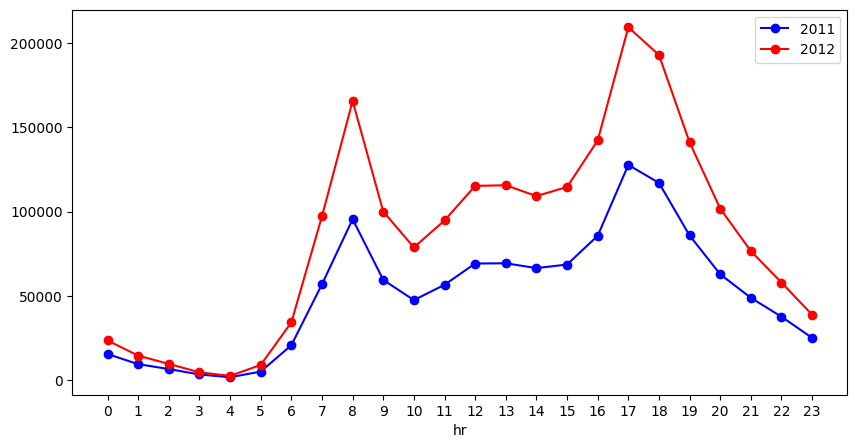

In [ ]:
plt.figure(figsize=(10,5))

final_hour_data[final_hour_data['new_yr']=='2011'].groupby(['hr'])['cnt'].sum().plot(kind='line', color='blue', marker='o')
final_hour_data[final_hour_data['new_yr']=='2012'].groupby(['hr'])['cnt'].sum().plot(kind='line', color='red', marker='o')

plt.xticks(range(0,24), rotation=0)

plt.legend(['2011', '2012'])
plt.show()

- In 2011, **June** show most users to rent bike while in 2012 there is an enhancement and the highest count of bike rent users is in **September**. From July to September it shows a positive trend line in count of bike rent.
- In 2011 and 2012, the best time to rent bike is at **17 or 5 p.m**. It show most count of bike rent users. This probably related how people want spend their time to enjoy the afternoon time. 

### **5.3 Analysis on Day's Affect to Bike Rent Activity**

Count how many holidays and weekend in a month from 2011 to 2012. Given a notion that bike rent activities increase during the holiday or weekend.

In [ ]:
#make a dataframe about holiday bike rent activities in 2011
holiday_pivot_2011=final_day_data[final_day_data['new_yr']=='2011'].groupby(['mnth']).agg({
    "dteday":"count",
    "workingday":"sum",
    "cnt":"sum"
    }).reset_index()

holiday_pivot_2011['offday']=holiday_pivot_2011['dteday']-holiday_pivot_2011['workingday']

holiday_pivot_2011_sorted=holiday_pivot_2011.sort_values('offday')

In [ ]:
#make a dataframe about holiday bike rent activities in 2012
holiday_pivot_2012=final_day_data[final_day_data['new_yr']=='2012'].groupby(['mnth']).agg({
    "dteday":"count",
    "workingday":"sum",
    "cnt":"sum"
    }).reset_index()

holiday_pivot_2012['offday']=holiday_pivot_2012['dteday']-holiday_pivot_2012['workingday']

holiday_pivot_2012_sorted=holiday_pivot_2012.sort_values('offday')

Text(0.5, 1.0, '2012')

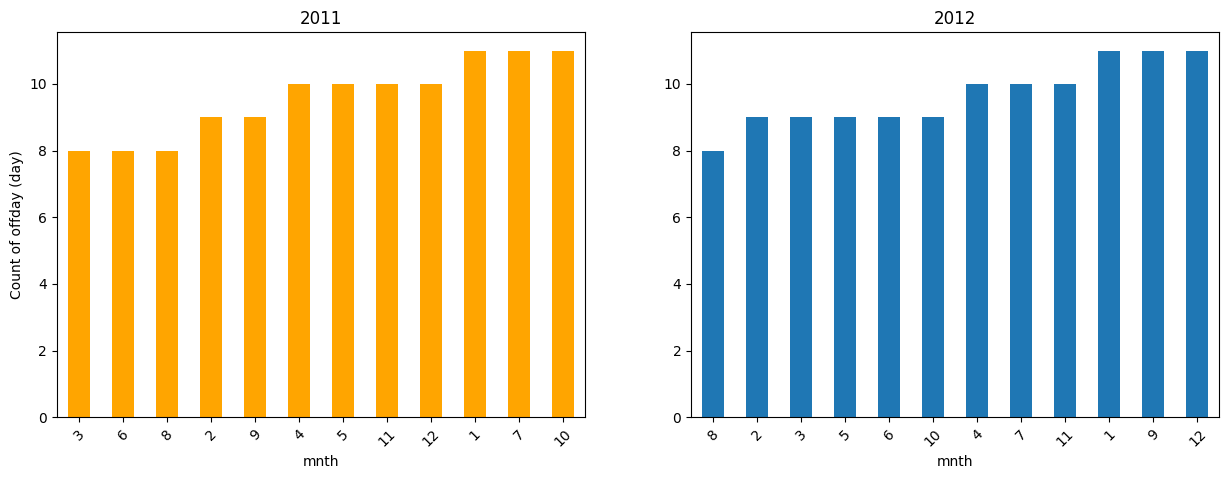

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5)) 

holiday_pivot_2011_sorted.plot(x='mnth', y= 'offday', kind='bar', ax=axs[0], legend=False, color='orange')
axs[0].tick_params(axis='x',labelrotation=45)
axs[0].set_title('2011')
axs[0].set_ylabel('Count of offday (day)')

holiday_pivot_2012_sorted.plot(x='mnth', y= 'offday', kind='bar', ax=axs[1], legend=False)
axs[1].tick_params(axis='x',labelrotation=45)
axs[1].set_title('2012')


Visualize bike rent users comparison in workingday or holiday/weekend from 2011 and 2012

In [ ]:
holiday_count_2011=final_hour_data[final_hour_data['new_yr']=='2011'].groupby(['mnth','workingday'])['cnt'].sum()
holiday_count_2012=final_hour_data[final_hour_data['new_yr']=='2012'].groupby(['mnth','workingday'])['cnt'].sum()

# holiday_count_2011

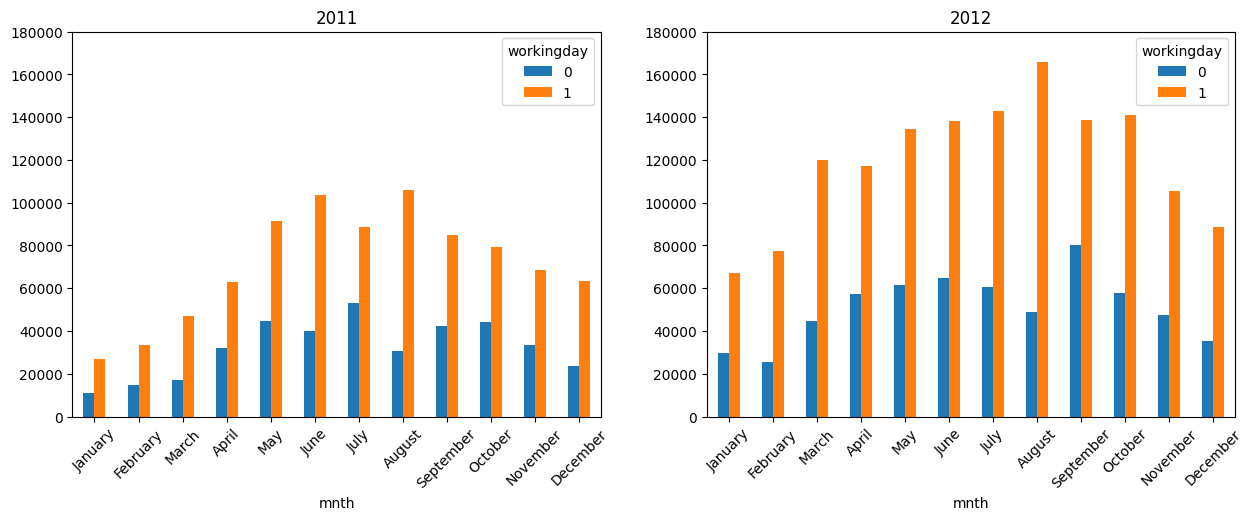

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5)) 

holiday_count_2011.unstack().plot(kind='bar',ax=axs[0])
holiday_count_2012.unstack().plot(kind='bar',ax=axs[1])

month_labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

axs[0].set_title('2011')
axs[0].set_ylim([0,180000])
axs[0].set_xticklabels(month_labels, rotation=45)

axs[1].set_title('2012')
axs[1].set_ylim([0,180000])
axs[1].set_xticklabels(month_labels, rotation=45)

plt.show()

In [ ]:
final_day_data['workingday'].corr(final_day_data['cnt'])

0.06115606306052071

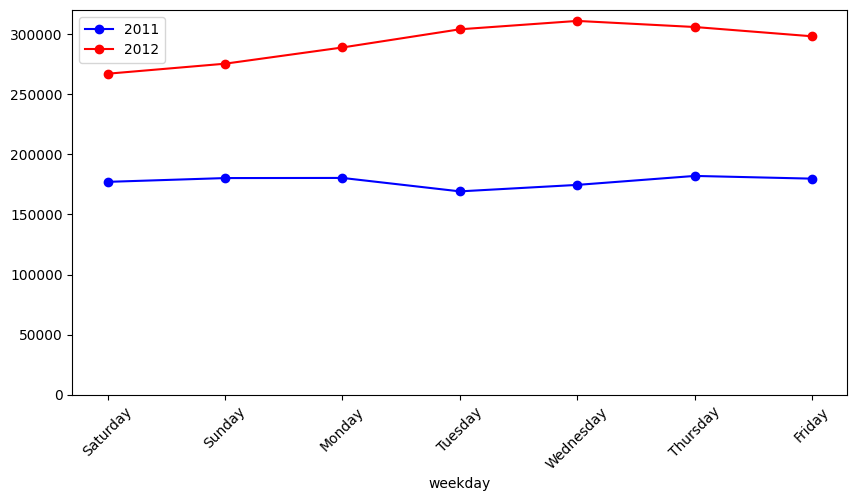

In [ ]:
# Analysis of bike rent activites by day
plt.figure(figsize=(10,5))

hour_df[hour_df['new_yr']=='2011'].groupby(['weekday'])['cnt'].sum().plot(kind='line', color='blue', marker='o')
hour_df[hour_df['new_yr']=='2012'].groupby(['weekday'])['cnt'].sum().plot(kind='line', color='red', marker='o')

day = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
plt.xticks(range(0,7), day, rotation=45)

plt.legend(['2011', '2012'])
plt.ylim([0,320000])
plt.show()

- There is **weak correlation** between total bike rent activites with when people rent wheter on workingday or not. It shows 0.0611 value. Although the result shows that people prefer choose weekday to rent bike instead of weekend, the count of bike rent during weekend is not that low.
- In 2011 and 2012, **August** show highest activites during the workingday
- In 2011 and 2012, people tend to rent bike during the **working day** instead of the holiday/weekend. 
- As mention above, in 2011 **Tuesday** and **Friday** show similar count which contain highest value while in 2012 it's on **Thursday**. All of them is in weekday.

### **5.4 Analysis on Weather or Environment Situation to Bike Rent Activity**

In first subsection in this step, `season` will be analyzed to `casual` and `registered`

In [ ]:
final_day_data.groupby(['new_season','new_yr'])[['casual','registered','cnt']].sum()

casual  registered     cnt
new_season new_yr                            
Fall       2011     95450      324200  419650
           2012    130641      510838  641479
Spring     2011     21425      128575  150000
           2012     39197      282151  321348
Summer     2011     77564      269752  347316
           2012    125958      445315  571273
Winter     2011     52813      273324  326137
           2012     76969      438507  515476

(0.0, 650000.0)

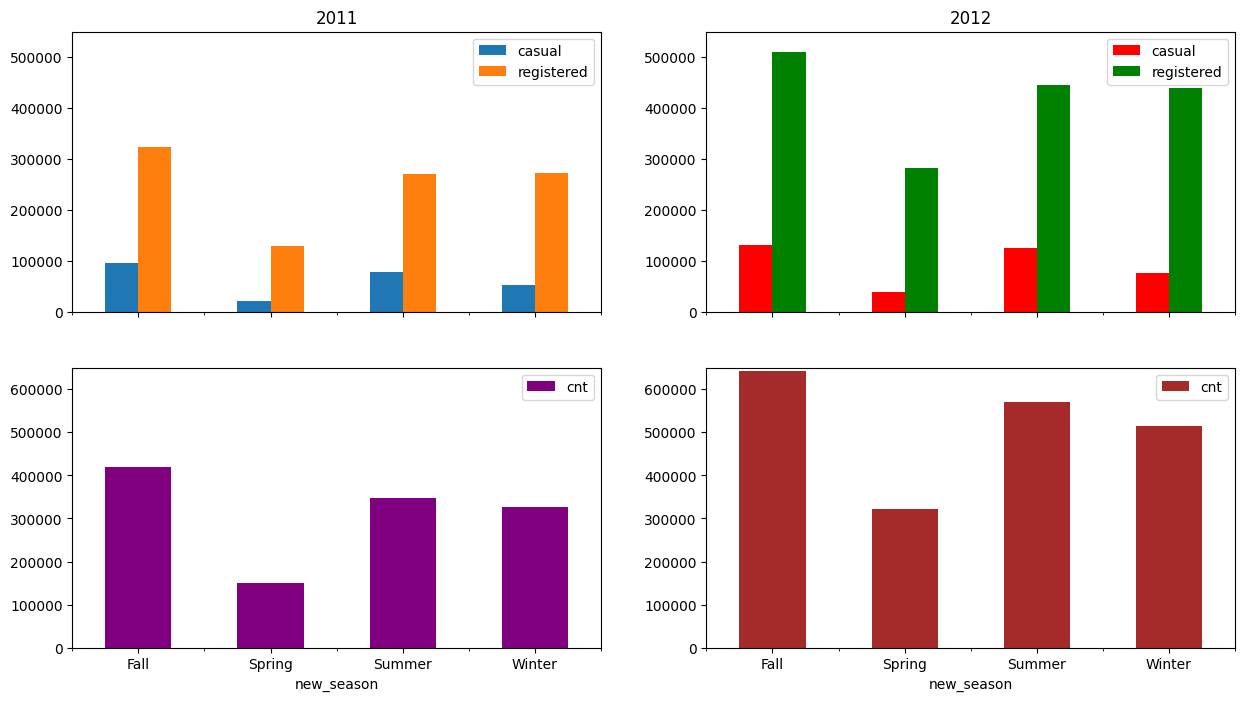

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,8), sharex=True) 

# 2011
final_hour_data[final_hour_data['new_yr']=='2011'].groupby(['new_season'])[['casual','registered']].sum().plot(kind='bar', ax=axs[0,0])
final_hour_data[final_hour_data['new_yr']=='2011'].groupby(['new_season'])[['cnt']].sum().plot(kind='bar', ax=axs[1,0], color='purple')

# 2012
final_hour_data[final_hour_data['new_yr']=='2012'].groupby(['new_season'])[['casual','registered']].sum().plot(kind='bar', ax=axs[0,1], color=['red','green'])
final_hour_data[final_hour_data['new_yr']=='2012'].groupby(['new_season'])[['cnt']].sum().plot(kind='bar', ax=axs[1,1], color='brown')

axs[0,0].tick_params(axis='x', rotation=0)
axs[0,0].set_title('2011')
axs[0,0].set_ylim([0,550000])

axs[1,0].tick_params(axis='x', rotation=0)
axs[1,0].set_ylim([0,650000])

axs[0,1].tick_params(axis='x', rotation=0)
axs[0,1].set_title('2012')
axs[0,1].set_ylim([0,550000])

axs[1,1].tick_params(axis='x', rotation=0)
axs[1,1].set_ylim([0,650000])

Next step, `weathersit` will be analyzed to `casual` and `registered`

In [ ]:
final_hour_data.groupby(['new_weathersit','new_yr'])[['casual','registered','cnt']].sum()

casual  registered      cnt
new_weathersit         new_yr                             
Clear, Few clouds      2011    183733      691320   875053
                       2012    279012     1184108  1463120
Heavy rain, snow       2011         1          35       36
                       2012         7         180      187
Light snow/ light rain 2011      9709       57786    67495
                       2012     13074       77762    90836
Mist, cloudy           2011     53809      246710   300519
                       2012     80672      414761   495433

(0.0, 1500000.0)

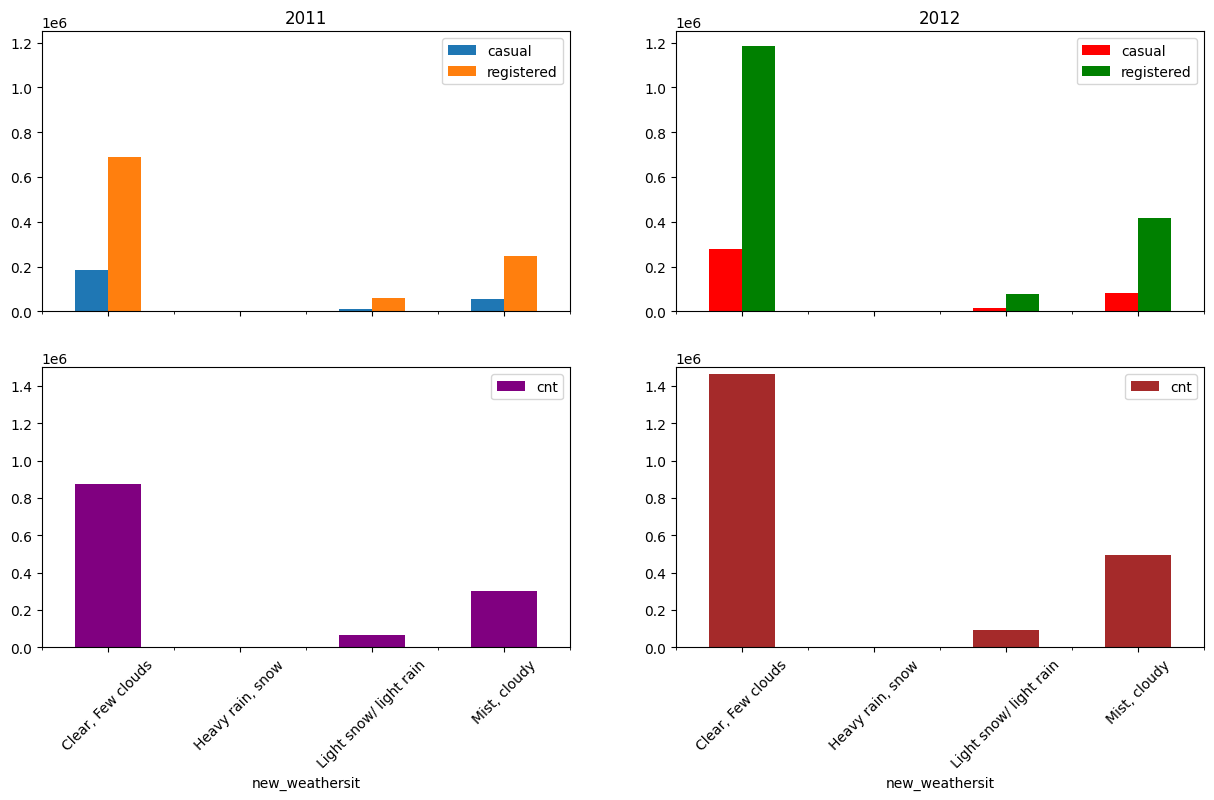

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,8), sharex=True) 

# 2011
final_hour_data[final_hour_data['new_yr']=='2011'].groupby(['new_weathersit'])[['casual','registered']].sum().plot(kind='bar', ax=axs[0,0])
final_hour_data[final_hour_data['new_yr']=='2011'].groupby(['new_weathersit'])[['cnt']].sum().plot(kind='bar', ax=axs[1,0], color='purple')

# 2012
final_hour_data[final_hour_data['new_yr']=='2012'].groupby(['new_weathersit'])[['casual','registered']].sum().plot(kind='bar', ax=axs[0,1], color=['red','green'])
final_hour_data[final_hour_data['new_yr']=='2012'].groupby(['new_weathersit'])[['cnt']].sum().plot(kind='bar', ax=axs[1,1], color='brown')

axs[0,0].tick_params(axis='x', rotation=0)
axs[0,0].set_title('2011')
axs[0,0].set_ylim([0,1.25e6])

axs[1,0].tick_params(axis='x', rotation=45)
axs[1,0].set_ylim([0,1.5e6])

axs[0,1].tick_params(axis='x', rotation=0)
axs[0,1].set_title('2012')
axs[0,1].set_ylim([0,1.25e6])

axs[1,1].tick_params(axis='x', rotation=45)
axs[1,1].set_ylim([0,1.5e6])

Environmental factors correlation

<Axes: >

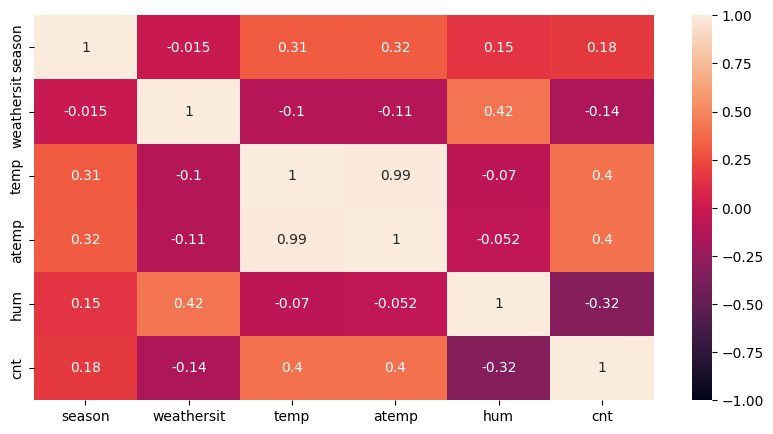

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(hour_df[['season','weathersit','temp','atemp','hum','cnt']].corr(),vmin=-1, vmax=1, annot=True)

- Both of 2011 and 2012 tell us that **Fall** is the favorite season to rent bike.
- Most people prefer **clear with few clouds** to rent bike during 2011 and 2012. 
- The number of rent bike activites have closest correlation to `temp` and `atemp` and **show good correlation** (not perfect correlation and it's make sense that the value is far from 1), so it can be implied that the tempereture increase does not necessarily have an effect on the number of rent bike activites because it has *best spot* that is about 25-32 &deg;C as shown in histogram (See Section 5.2). 

## **6. Answering Business Questions**
***

Here are the answers from the business question from Section 2

### 6.1. How was the bike rent trend from 2011 to 2012? 

1. The bike rent trend **has increased generally** by **806473** activites from 2011 to 2012. 
1. In same month and day, the bike rent activites increased and the most significant values for month and day is **September** and **17** respectively.
1. Both of 2011 and 2012 show same pattern that peak activities occurs in the **middle of year** and it's related to the season so in the begin and end of year it show low activites. 

### 6.2. How do day, which is wheter weekday or weekend, affect the count of bike rent? 

1. People prefer to rent bike during the **weekday** instead of weekend/holiday although the activites during the weekday and weekend have no significant difference. 
2. This happens because people **might be** awared to use eco-friendly vehicle for their daily routinity and choose **rent a bike as an alternative**.  

### 6.3. How do weather situation affect the count of bike rent?

1. Both of 2011 and 2012 show people pretend to rent bike in **Fall** season which provide clear with few clouds although weather condition is unpredictable. 
1. **Clear with flew clouds** is the favourite condition so many people do bike rent activities and this condition show 'best spot' that is **25-32 &deg;C**. 

### 6.4  What month shows the highest bike rent? 

 In 2011, **June** show most users to rent bike while in 2012 there is an enhancement and the highest count of bike rent users is in **September**. From July to September it shows a positive trend line in count of bike rent.

### 6.5. What times indicates best bike rent activities?

The best time to rent bike is at **17 or 5 p.m**. In 2011 **Tuesday** and **Friday** are 2 favourite days to rent bike while in 2012 it's on **Thursday**.

### 6.6. How does casual user compare to registered user from total rental bikes?  

1. Generally, ratio between casual user to registered user is **1:4**. 
2. The number of registered bike rent users increased **1.7%** or about **680960 users** from 2011 to 2012. 